In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-and-laptop-sales-data/mobile_sales_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/mobiles-and-laptop-sales-data/mobile_sales_data.csv')

In [4]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product                  50000 non-null  object
 1   Brand                    50000 non-null  object
 2   Product Code             50000 non-null  object
 3   Product Specification    50000 non-null  object
 4   Price                    50000 non-null  int64 
 5   Inward Date              50000 non-null  object
 6   Dispatch Date            50000 non-null  object
 7   Quantity Sold            50000 non-null  int64 
 8   Customer Name            50000 non-null  object
 9   Customer Location        50000 non-null  object
 10  Region                   50000 non-null  object
 11  Core Specification       25017 non-null  object
 12  Processor Specification  50000 non-null  object
 13  RAM                      50000 non-null  object
 14  ROM                      50000 non-nul

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
dtype: int64

### if there find values in in two condition:
#### remove values in Core Specification when product =moblie phone becouse Core Specification is specific laptop
#### remove values in processor Specification when product =laptop becouse processer Specification is specific mobile phone
#### remove values in SDD  when product =laptop becouse SDD is specific laptop

In [8]:
mask=(df['Product']=='Mobile Phone')  & (df['Core Specification'].notna())
df.loc[mask, 'Core Specification'] = np.nan

In [9]:
mask=(df['Product']=='Laptop')&(df['Processor Specification'].notna())
df.loc[mask, "Processor Specification"]=np.nan

In [10]:
mask=(df['Product']=='Mobile Phone')&(df['SSD'].notna())
df.loc[mask,'SSD']=np.nan

#### I see the missing values where the relationships between the columns are logical.

In [11]:
df[(df['Product']=='Laptop')&df['Core Specification'].isna()]

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD


In [12]:
df[(df['Product']=='Mobile Phone')&df['Processor Specification'].isna()]

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD


In [13]:
df[(df['Product']=='Laptop') &(df['SSD'].isna())]

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD


#### convert Inward Date and  Dispatch Date columns 	in to date date type

In [14]:
df['Inward Date']=pd.to_datetime(df['Inward Date'])
df['Dispatch Date']=pd.to_datetime(df['Dispatch Date'])

#### convert Inward Date and  Dispatch Date columns 	in to day , month and year

In [15]:
df['year_Inward Date']=df['Inward Date'].dt.year
df['month_Inward Date']=df['Inward Date'].dt.month
df['day_Inward Date']=df['Inward Date'].dt.day


In [16]:
df['year_dispatched date']=df['Dispatch Date'].dt.year
df['month_dispatched date']=df['Dispatch Date'].dt.month
df['day_dispatched date']=df['Dispatch Date'].dt.day

#### drop column Inward Date	 and column Dispatch Date	

In [17]:
df.drop('Inward Date',axis=1,inplace=True)
df.drop('Dispatch Date',axis=1,inplace=True)

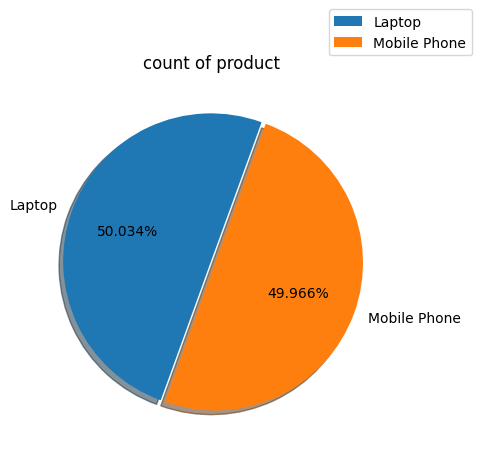

,count
Product,
Laptop,25017
Mobile Phone,24983


In [18]:
plt.pie(df['Product'].value_counts().values,labels=df['Product'].value_counts().index,
       explode=[0,0.03],autopct='%0.3f%%',shadow=True,startangle=70)
plt.legend(loc='upper left',bbox_to_anchor=[0.8,1.2])
plt.title('count of product')
plt.show()
pd.DataFrame(df['Product'].value_counts())

Brand,Google,Nokia,Apple,Samsung,Toshiba,Sony,OnePlus,Acer,Redmi,Huawei,Vivo,Motorola,Lenovo,iQOO,Oppo,Microsoft,HP,Dell,Asus,Realme
count,2598,2571,2564,2558,2555,2547,2541,2533,2529,2497,2489,2483,2471,2467,2460,2457,2446,2435,2413,2386


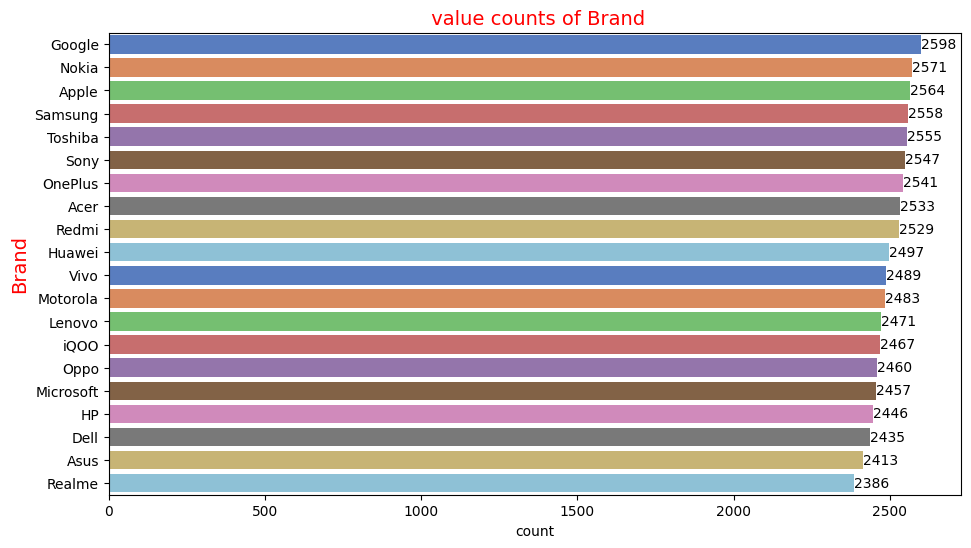

In [19]:
plt.figure(figsize=(11,6))
sns.barplot(x=df['Brand'].value_counts().values,y=df['Brand'].value_counts().index,palette='muted')
plt.title (' value counts of Brand',fontsize=14,color='r')
plt.xlabel('count')
plt.ylabel('Brand',fontsize=14,color='r')
for index,value in enumerate (df['Brand'].value_counts().values):
    plt.text(value,index,str(value),va='center',ha='left')
pd.DataFrame(df['Brand'].value_counts()).T

In [20]:
df.shape[0]

50000

In [21]:
df['Product Code'].nunique()

50000

Customer Name,Michael Williams,Robert Smith,Michael Johnson,John Smith,Christopher Smith,James Smith,Michael Jones,Michael Smith,Jennifer Smith,Robert Johnson
count,22,22,21,19,18,17,17,16,16,16


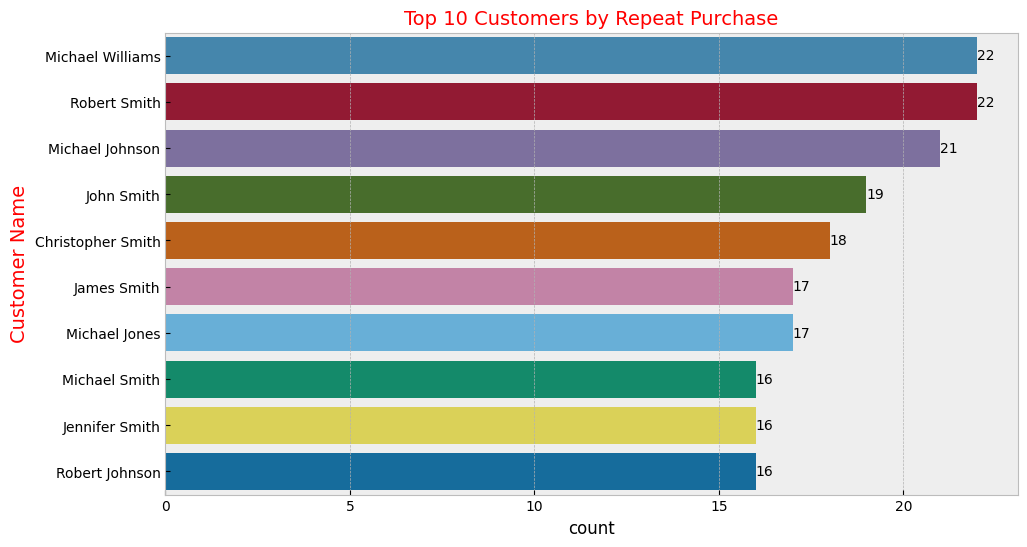

In [22]:
plt.style.use('bmh')
plt.figure(figsize=(11,6))
ax=df['Customer Name'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=ax.values,y=ax.index)
plt.title ('Top 10 Customers by Repeat Purchase',fontsize=14,color='r')
plt.xlabel('count')
plt.ylabel('Customer Name',fontsize=14,color='r')
for index,value in enumerate (ax.values):
    plt.text(value,index,str(value),va='center',ha='left')
pd.DataFrame(ax).T

Customer Location,South Michael,North Michael,East Michael,New James,New Michael,Lake Michael,Port Michael,New John,Michaelmouth,Lake James
count,54,40,39,39,38,38,37,35,34,34


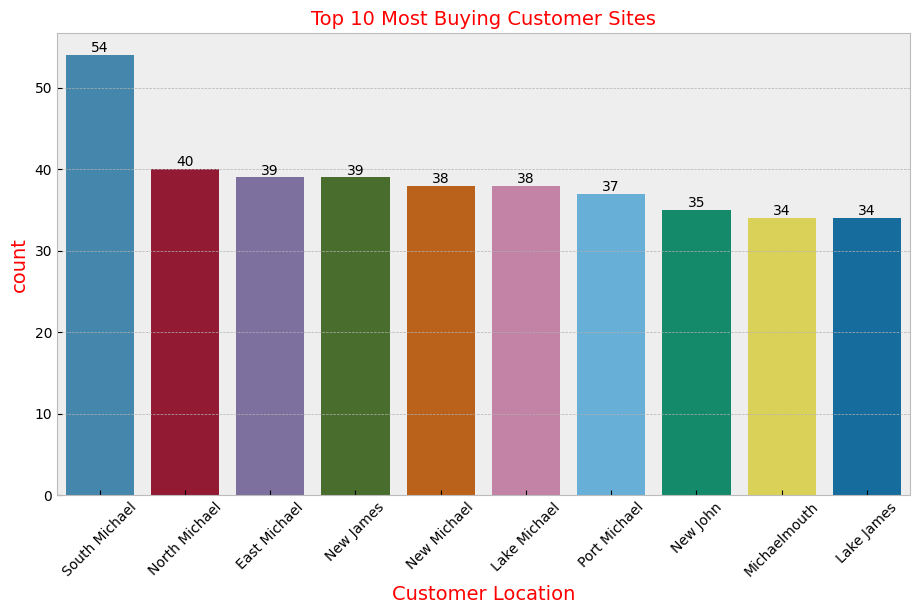

In [23]:
plt.style.use('bmh')
plt.figure(figsize=(11,6))
ax=df['Customer Location'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=ax.index,y=ax.values)
plt.title ('Top 10 Most Buying Customer Sities',fontsize=14,color='r')
plt.xlabel('Customer Location',fontsize=14,color='r')
plt.xticks(rotation=45)
plt.ylabel('count',fontsize=14,color='r')
for index,value in enumerate (ax.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
pd.DataFrame(ax).T

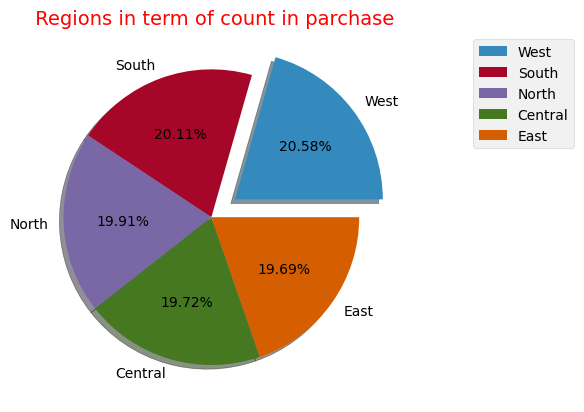

In [24]:
ax=df['Region'].value_counts()
plt.pie(ax.values,labels=ax.index,autopct='%0.2f%%' ,explode=[0.2,0,0,0,0],shadow=True)
plt.title(' Regions in term of count in parchase',fontsize=14,color='r')
plt.legend(bbox_to_anchor=[1.5,1])
plt.show()

Core Specification,i5,Ryzen 3,i9,i3,Ryzen 7,i7,Ryzen 5,Ryzen 9
count,3215,3176,3146,3143,3135,3105,3050,3047


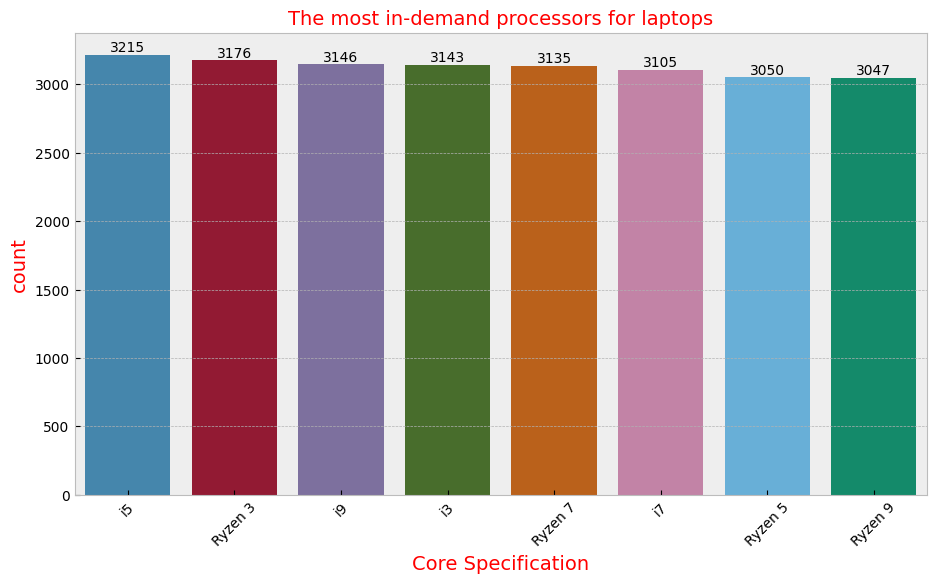

In [25]:
plt.style.use('bmh')
plt.figure(figsize=(11,6))
ax=df['Core Specification'].value_counts().sort_values(ascending=False)
sns.barplot(x=ax.index,y=ax.values)
plt.title ('The most in-demand processors for laptops',fontsize=14,color='r')
plt.xlabel('Core Specification',fontsize=14,color='r')
plt.xticks(rotation=45)
plt.ylabel('count',fontsize=14,color='r')
for index,value in enumerate (ax.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
pd.DataFrame(ax).T

Processor Specification,MediaTek Dimensity,Snapdragon 8 Gen,Snapdragon 7s,Samsung Exynos,Apple A-Series,Snapdragon 7 Gen,MediaTek Helio
count,3640,3614,3590,3581,3565,3563,3430


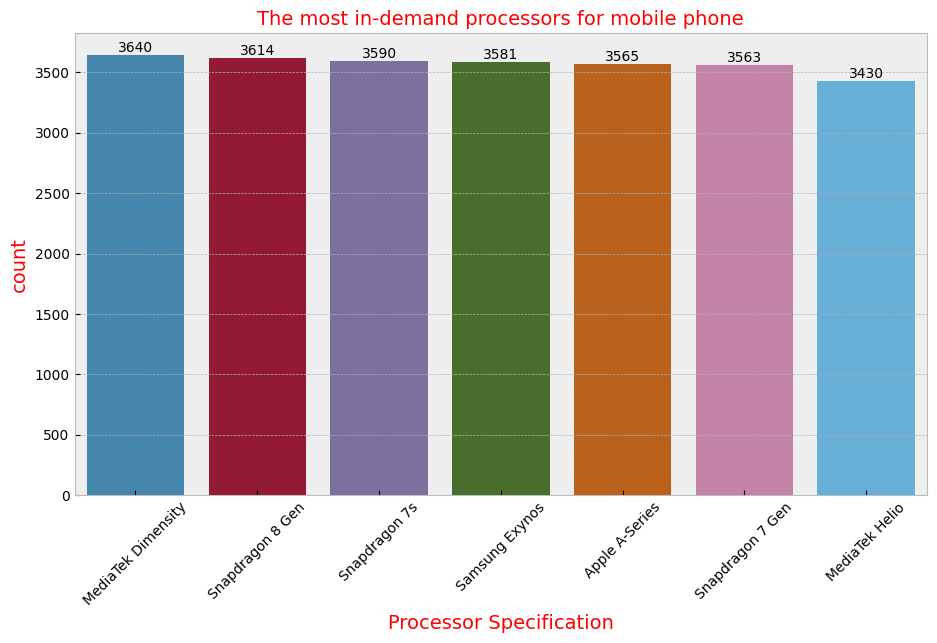

In [26]:
plt.style.use('bmh')
plt.figure(figsize=(11,6))
ax=df['Processor Specification'].value_counts().sort_values(ascending=False)
sns.barplot(x=ax.index,y=ax.values)
plt.title ('The most in-demand processors for mobile phone',fontsize=14,color='r')
plt.xlabel('Processor Specification',fontsize=14,color='r')
plt.xticks(rotation=45)
plt.ylabel('count',fontsize=14,color='r')
for index,value in enumerate (ax.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
pd.DataFrame(ax).T

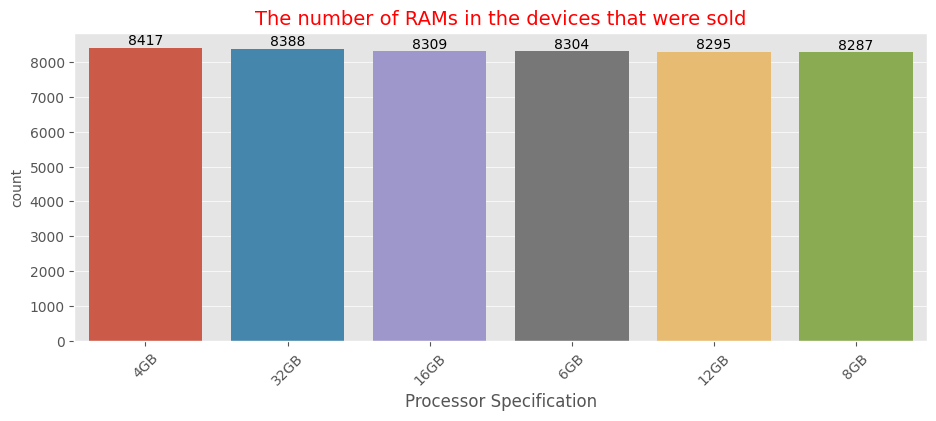

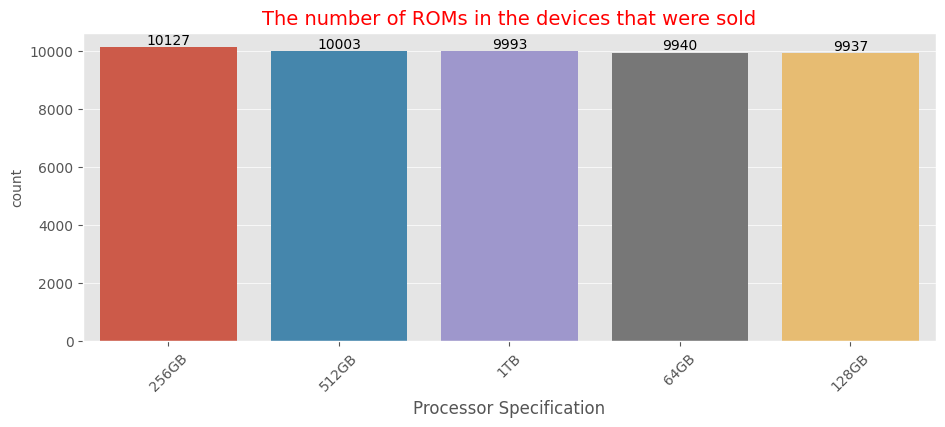

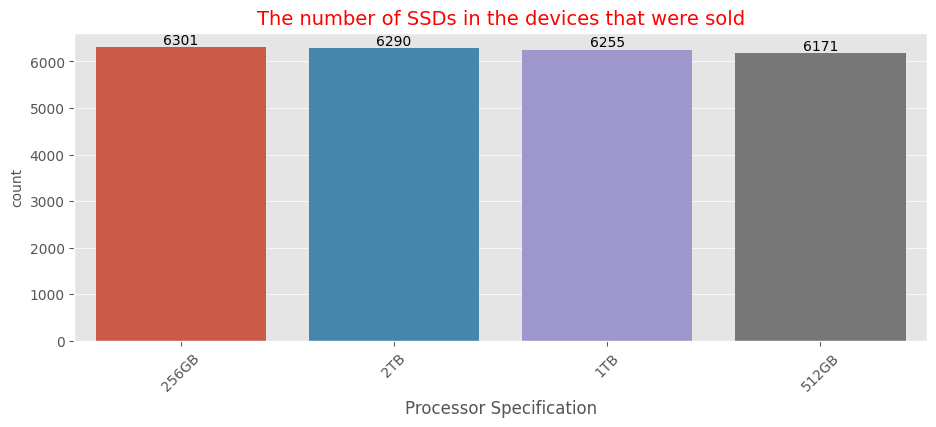

In [27]:
columns=['RAM','ROM','SSD']
for i in df[columns]:
    plt.style.use('ggplot')
    plt.figure(figsize=(11,4))
    ax=df[i].value_counts().sort_values(ascending=False)
    sns.barplot(x=ax.index,y=ax.values)
    plt.title (f'The number of {i}s in the devices that were sold',fontsize=14,color='r')
    plt.xlabel('Processor Specification')
    plt.xticks(rotation=45)
    plt.ylabel('count',fontsize=10)
    for index,value in enumerate (ax.values):
        plt.text(index,value,str(value),va='bottom',ha='center')
        

In [28]:
df[['Price']].describe()

,Price
count,50000.000000
mean,102641.407080
std,56363.550361
min,5008.000000
25%,53487.000000
50%,103072.000000
75%,151396.250000
max,199999.000000


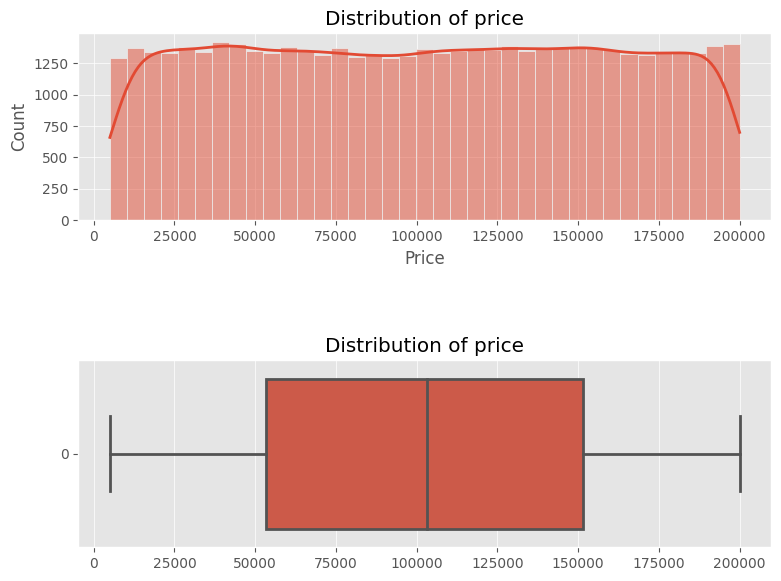

In [29]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
sns.histplot(df['Price'],kde=True)
plt.title('Distribution of price')
plt.subplot(2,1,2)
sns.boxplot(df['Price'],orient='h')
plt.title('Distribution of price')

plt.tight_layout(pad=5)


In [30]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1
minx=df['Price'].min()
maxx=df['Price'].max()
upper_bound=Q3+1.5*IQR
lower_bound=Q3-1.5*IQR
if maxx>upper_bound:
    print(f'outliers={maxx-upper_bound}')
elif minx<lower_bound:
    print(f'outliers={lower_bound-minx}')
else:
    print('no outliers')


no outliers


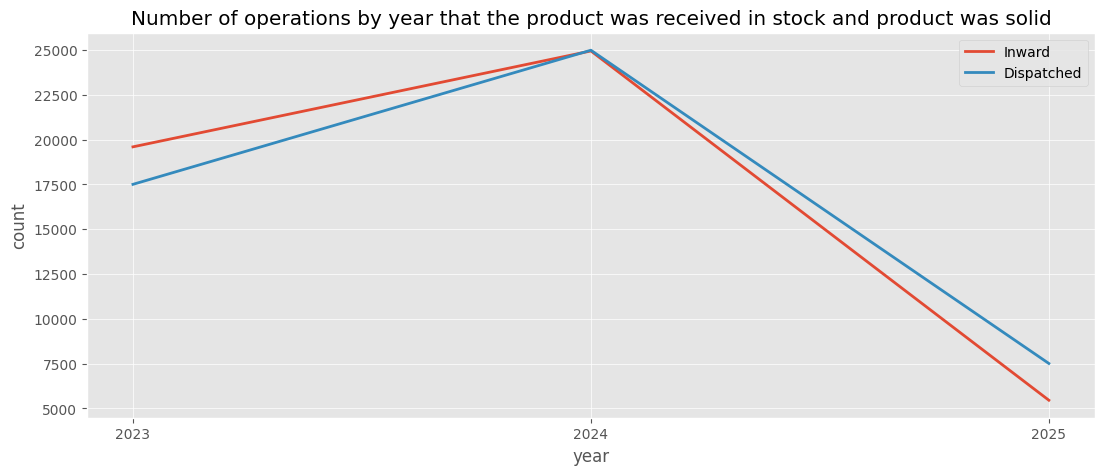

In [31]:
plt.figure(figsize=(13,5))
year_counts_inward = df['year_Inward Date'].value_counts().sort_index()
year_counts_dispatched = df['year_dispatched date'].value_counts().sort_index()
plt.plot(year_counts_inward.index,year_counts_inward.values,label='Inward')
plt.plot(year_counts_dispatched.index,year_counts_dispatched.values,label='Dispatched')
plt.title("Number of operations by year that the product was received in stock and product was solid")
plt.xlabel("year")
plt.ylabel("count")
plt.legend()
plt.xticks(year_counts_inward.index.astype(int))
plt.show()

month_dispatched date,3,8,10,12,7,5,1,4,11,6,9,2
count,4303,4276,4235,4235,4199,4180,4153,4136,4117,4103,4066,3997


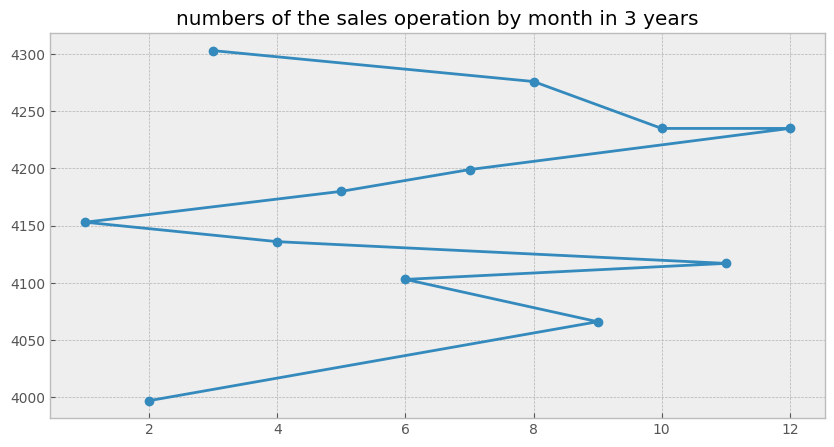

In [32]:
plt.style.use('bmh')
plt.figure(figsize=(10,5))
ax=df['month_dispatched date'].value_counts()
plt.plot(ax.index,ax.values,marker='o')
plt.title('numbers of the sales operation by month in 3 years')
pd.DataFrame(df['month_dispatched date'].value_counts()).T

Product
Laptop          2571362661
Mobile Phone    2560707693
Name: Price, dtype: int64


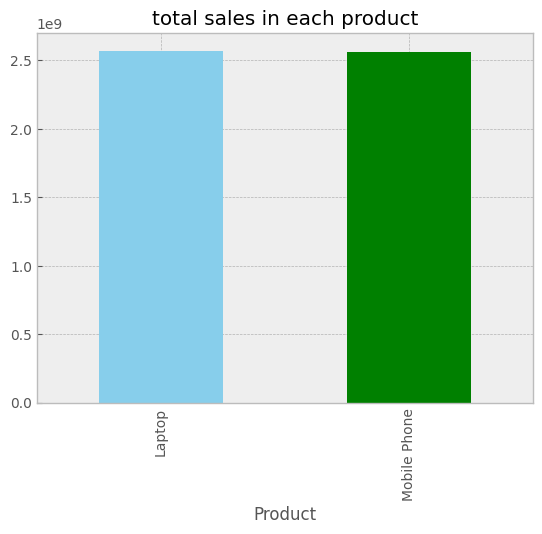

In [33]:
print(df.groupby('Product')['Price'].sum())
df.groupby('Product')['Price'].sum().plot(kind='bar',color=['skyblue','green'])
plt.title('total sales in each product')
plt.show()



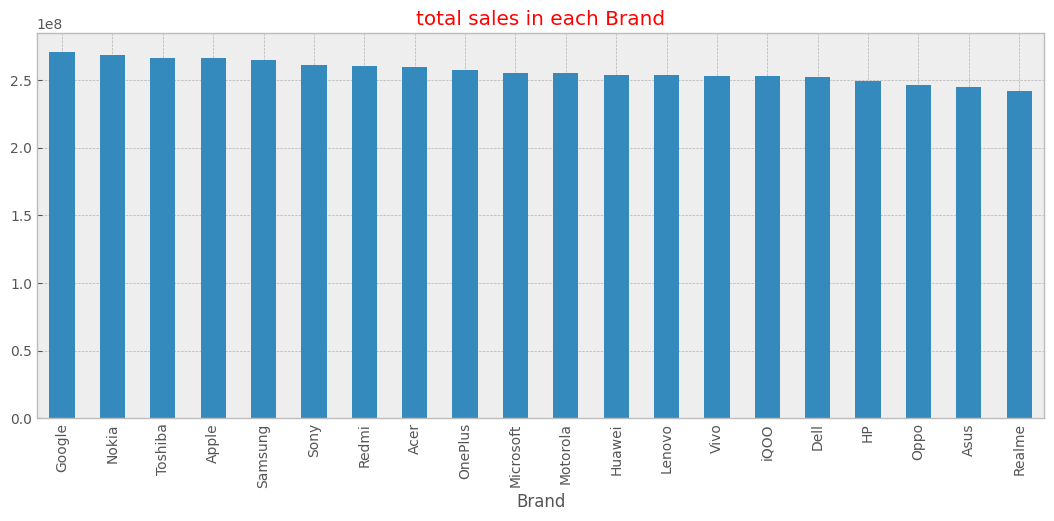

Brand,Google,Nokia,Toshiba,Apple,Samsung,Sony,Redmi,Acer,OnePlus,Microsoft,Motorola,Huawei,Lenovo,Vivo,iQOO,Dell,HP,Oppo,Asus,Realme
Price,270994713,268496172,266294309,265960709,264453766,261164266,260073739,259780150,257141804,255138347,255075498,253833633,253467596,252941231,252770959,252140927,249462401,246415439,244452608,242012087


In [34]:
pd.DataFrame(df.groupby('Brand')['Price'].sum()).T
df.groupby('Brand')['Price'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(13,5))
plt.title('total sales in each Brand',color='r')
plt.show()
pd.DataFrame(df.groupby('Brand')['Price'].sum().sort_values(ascending=False)).T


Customer Name
Michael Johnson      2592132
Robert Johnson       2428364
Christopher Smith    2272635
John Smith           2224476
Michael Williams     2136381
Name: Price, dtype: int64


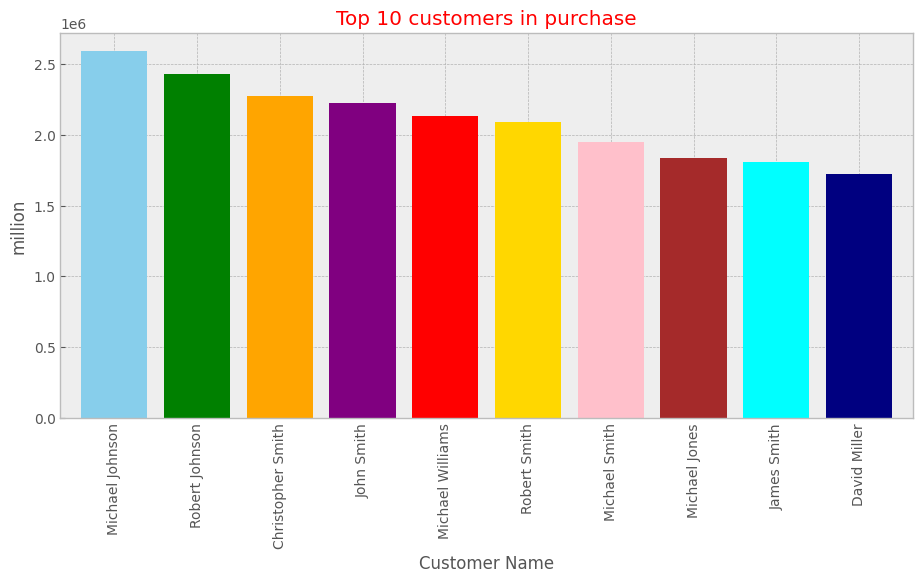

In [35]:
plt.figure(figsize=(11,5))

print(df.groupby('Customer Name')['Price'].sum().sort_values(ascending=False).head())
colors = ['skyblue', 'green', 'orange', 'purple', 'red', 
          'gold', 'pink', 'brown', 'cyan', 'navy']
df.groupby('Customer Name')['Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color=colors,width=0.8)
plt.title('Top 10 customers in purchase',color='r')
plt.ylabel('million')
plt.show()


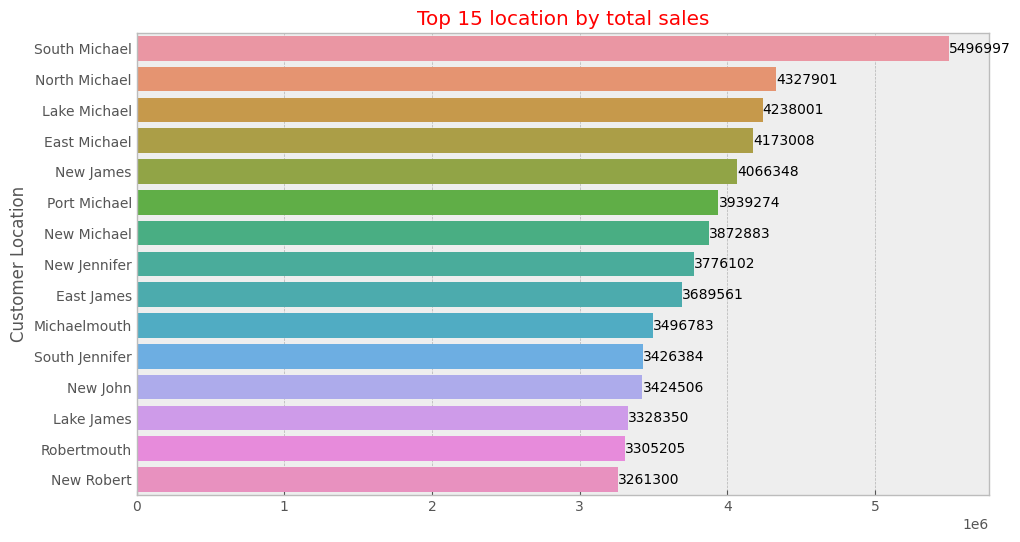

In [36]:
plt.figure(figsize=(11,6))
ax=df.groupby('Customer Location')['Price'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=ax.values,y=ax.index)
plt.title('Top 15 location by total sales',color='r')
for index,value in enumerate(ax.values):
    plt.text(value,index,str(value),va='center',ha='left')

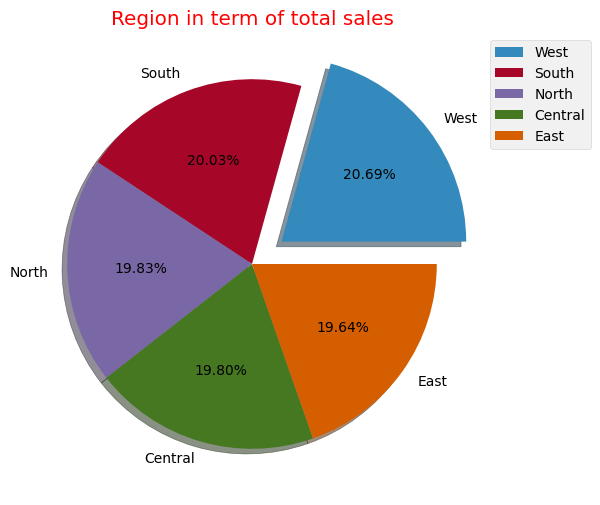

In [37]:
plt.figure(figsize=(11,6))
ax=df.groupby('Region')['Price'].sum().sort_values(ascending=False).head(15)
plt.pie(ax.values,labels=ax.index,autopct='%0.2f%%',explode=[0.2,0,0,0,0],shadow=True)
plt.title('Region in term of total sales',color='r')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

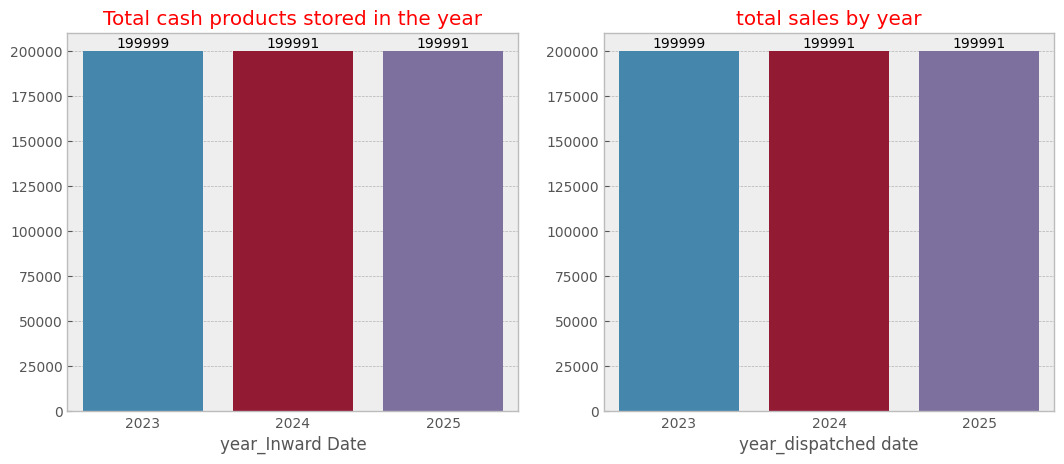

In [38]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
ax=df.groupby('year_Inward Date')['Price'].max().sort_values(ascending=False)
sns.barplot(x=ax.index,y=ax.values)
plt.title('Total cash products stored in the year',color='r')
for index,value in enumerate (ax.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
plt.subplot(1,2,2)
a=df.groupby('year_dispatched date')['Price'].max().sort_values(ascending=False)
sns.barplot(x=a.index,y=a.values)
plt.title('total sales by year',color='r')
for index,value in enumerate (a.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
plt.tight_layout(pad=2)

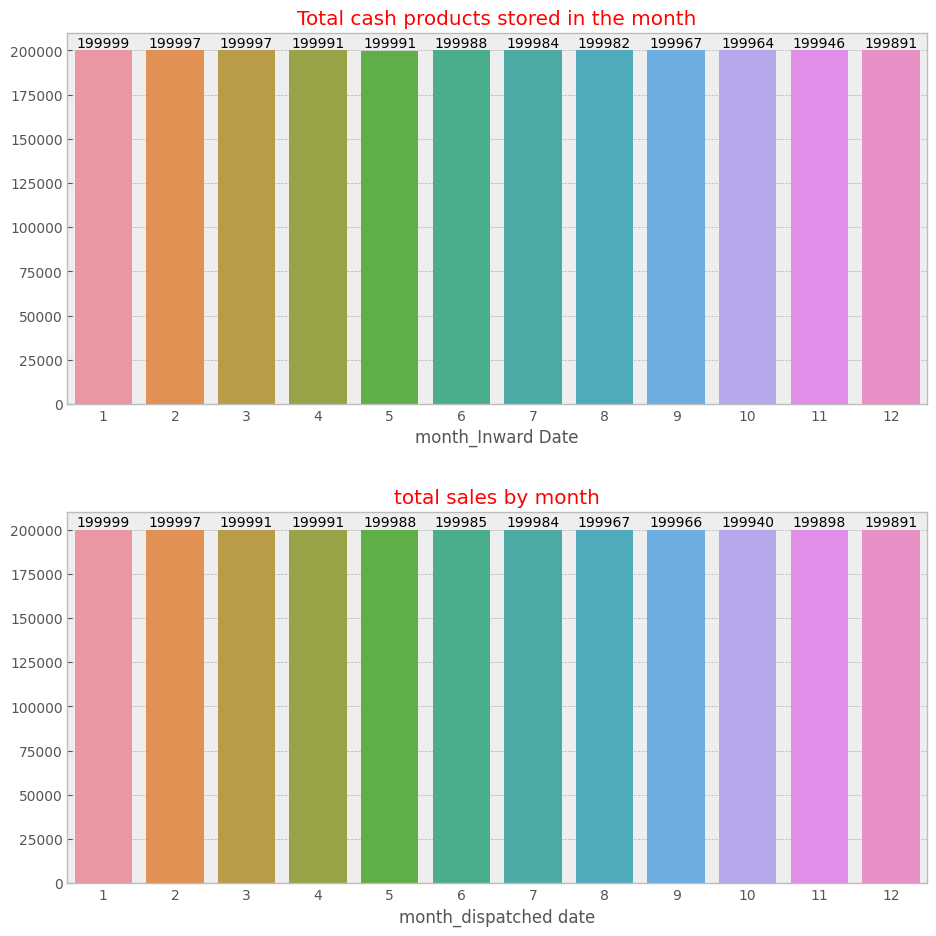

In [39]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
ax=df.groupby('month_Inward Date')['Price'].max().sort_values(ascending=False)
sns.barplot(x=ax.index,y=ax.values)
plt.title('Total cash products stored in the month',color='r')
for index,value in enumerate (ax.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
plt.subplot(2,1,2)
a=df.groupby('month_dispatched date')['Price'].max().sort_values(ascending=False)
sns.barplot(x=a.index,y=a.values)
plt.title('total sales by month',color='r')
for index,value in enumerate (a.values):
    plt.text(index,value,str(value),va='bottom',ha='center')
plt.tight_layout(pad=3)

Brand,Acer,Apple,Asus,Dell,Google,HP,Huawei,Lenovo,Microsoft,Motorola,Nokia,OnePlus,Oppo,Realme,Redmi,Samsung,Sony,Toshiba,Vivo,iQOO
Product,,,,,,,,,,,,,,,,,,,,
Laptop,130101756,139401926,121280402,127355384,136119086,123754018,122483863,122780419,126882236,130276156,136061660,127967910,121466938,121206818,134870133,133629957,129971549,132390658,129829509,123532283
Mobile Phone,129678394,126558783,123172206,124785543,134875627,125708383,131349770,130687177,128256111,124799342,132434512,129173894,124948501,120805269,125203606,130823809,131192717,133903651,123111722,129238676


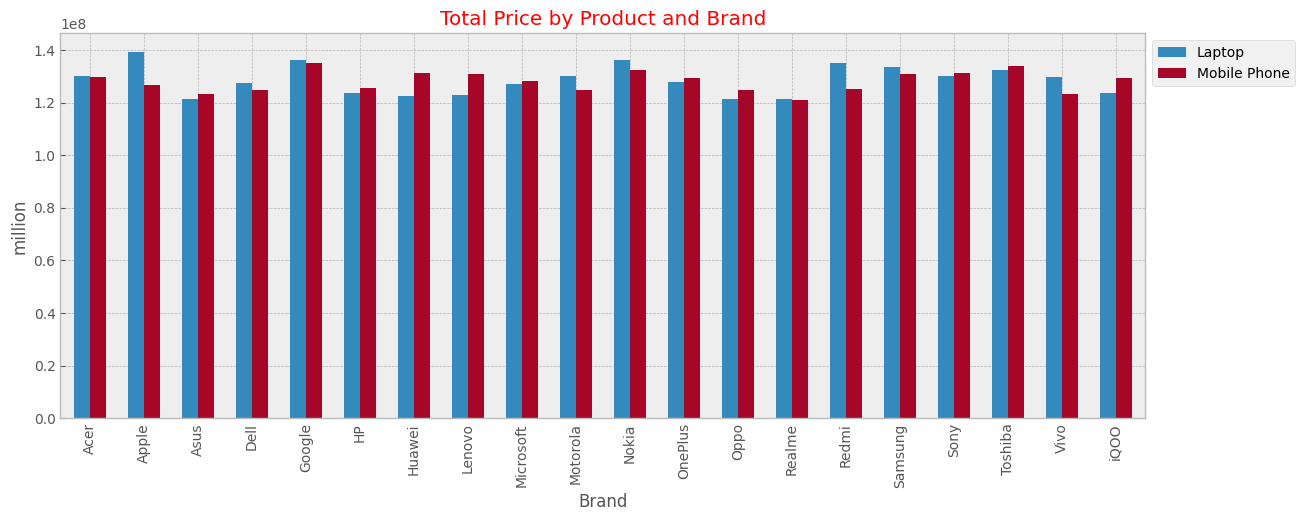

In [41]:
pd.crosstab(df['Brand'],df['Product'],values=df['Price'],aggfunc='sum').plot(kind='bar',figsize=(14,5),width=0.6)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Total Price by Product and Brand',color='r')
plt.ylabel('million')
pd.crosstab(df['Brand'],df['Product'],values=df['Price'],aggfunc='sum').T


#### Total price for each Brand and Region

In [42]:
pd.crosstab(df['Brand'],df['Region'],values=df['Price'],aggfunc='sum')

Region,Central,East,North,South,West
Brand,,,,,
Acer,52128320,51144200,50251800,53776243,52479587
Apple,49363679,51410504,54447008,54529867,56209651
Asus,47640264,49366970,46820196,49124025,51501153
Dell,52479397,46518439,49965407,50389473,52788211
Google,50370544,53556579,55582737,56016103,55468750
HP,52781261,52785903,44563814,49471526,49859897
Huawei,50133115,49962205,52506753,51018394,50213166
Lenovo,48051577,48438766,51837516,53336186,51803551
Microsoft,49510687,47406666,51243548,51628309,55349137


#### Total sales by for each Brand and  each Year

In [43]:
pd.crosstab(df['Brand'],df['year_dispatched date'],values=df['Price'],aggfunc='sum')

year_dispatched date,2023,2024,2025
Brand,,,
Acer,83143695,133853371,42783084
Apple,94930932,129472613,41557164
Asus,86432131,124744091,33276386
Dell,87697017,125858421,38585489
Google,96584186,139768967,34641560
HP,87366205,129308735,32787461
Huawei,88804134,128362650,36666849
Lenovo,90864886,122776099,39826611
Microsoft,82331036,132624568,40182743


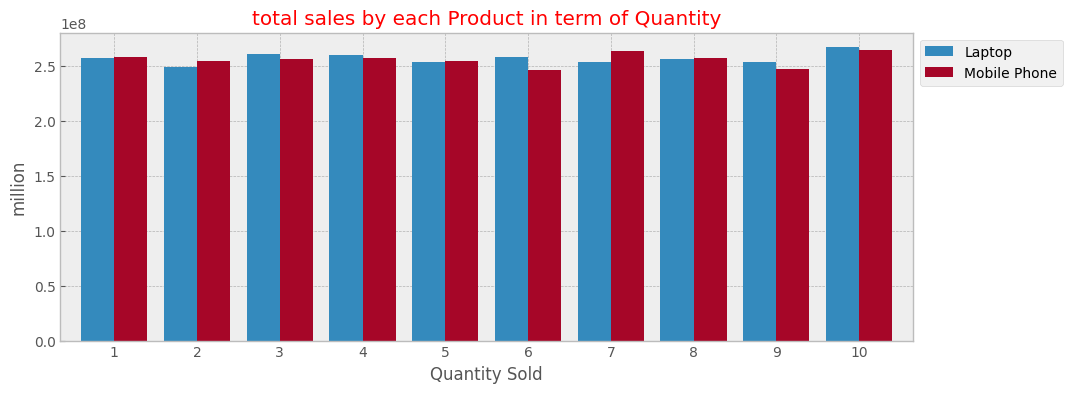

Quantity Sold,1,2,3,4,5,6,7,8,9,10
Product,,,,,,,,,,
Laptop,257466515,249060755,260705192,260184271,253355832,258496938,253985365,256861151,254039834,267206808
Mobile Phone,258569374,254966840,256649274,257010625,254509309,246230811,263577118,256982243,247777247,264434852


In [44]:
pd.crosstab(df['Quantity Sold'],df['Product'],values=df['Price'],aggfunc='sum').plot(kind='bar',width=0.8,figsize=(11,4))
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(rotation=0)
plt.ylabel('million')
plt.title('total sales by each Product in term of Quantity',color='r')
plt.show()
pd.crosstab(df['Product'],df['Quantity Sold'],values=df['Price'],aggfunc='sum')
